In [1]:
# Understanding recurrent neural network

# 一、 A pseudo-code simple RNN

In [3]:
# This is the state at t
state_t = 0

# We interate over sequence elements
for input_t in input_sequence:
    # 'f' is our "step function"
    output_t = f(input_t, state_t)
    # The previous output becomes the new state
    state_t = output_t

# 二、 More detailed pseudo-code simple RNN

In [ ]:
# This is the state at t
state_t = 0

# We interate over sequence elements
for input_t in input_sequence:
    # 'f' is our "step function"
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
    # The previous output becomes the new state
    state_t = output_t

# 三、 Numpy implementation of a simple RNN

In [6]:
import numpy as np

# Number of timesteps in the input sequences
timesteps = 100
# Dimensionality of the input feature space
input_features = 32
# Dimensionality of the output feature space
output_features = 64

# This is our input data  -- just random noise for the sake of our examples
inputs = np.random.random((timesteps, features))
# inputs = np.random.random((timesteps, features))  == 书中是这样的

# This is our "initial state": an all-zero vector
state_t = np.zeros((output_features, ))

# Create random weight matrices
W = np.random.random((input_features, output_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features))

successive_outputs = []
# input_t is a vector of shape (input_features,)
for input_t in inputs:
        # We combine the input with the cerrent state
        # (i.e the previous output) to obtain the current output
        output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
        
        # We store this output in a list
        successive_outputs.append(output_t)
        
        # We update the 'state' of tht network for the next timestep
        state_t = output_t
        
# The final output is a 2D tensor of shape (timesteps, output_features)
final_output_sequence = np.concatenate(successive_outputs, axis = 0)

# 四、 A first recurrent layer in Keras

## 4.1 SimpleRNN

In [7]:
# The Keras SimpleRNN layer
from keras.layers import SimpleRNN

Using TensorFlow backend.


In [8]:
# Using SimpleRNN and returning the last state
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Using SimpleRNN and return the full state sequence
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences = True))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [10]:
# P185
# Stacking RNN layers on top of each other
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
# This last layer only returns the last outputs
model.add(SimpleRNN(32))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Preparing the IMDB data
from keras.datasets import imdb
from keras.preprocessing import sequence

# Number of words to consider as features
max_features = 10000

# Cut texts after this number of words
#(among top max_features most common words)
maxlen = 500
batch_size = 32

print('Loading data...')
# Loading the data as lists of integers
(input_train, y_train), (input_test, y_test) = imdb.load_data(path = '/home/sally/Sally/DataSets/imdb/imdb.npz', num_words=max_features)
print(len(input_train))
print(len(input_test))

print('Pad sequences (samples x times)')
# This turns our lists of integer
# into a 2D integer tensor of shape '(samples, maxlen)'
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape', input_test.shape)

Loading data...
25000
25000
Pad sequences (samples x times)
input_train shape: (25000, 500)
input_test shape (25000, 500)


In [13]:
# Training our model including an Embedding layer and a SimpleRNN layer
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

/home/sally/.local/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.5520 - acc: 0.7164 - val_loss: 0.6003 - val_acc: 0.7224
Epoch 2/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.3464 - acc: 0.8590 - val_loss: 0.3782 - val_acc: 0.8334
Epoch 3/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.2753 - acc: 0.8942 - val_loss: 0.4460 - val_acc: 0.8446
Epoch 4/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.2362 - acc: 0.9105 - val_loss: 0.3569 - val_acc: 0.8470
Epoch 5/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.1917 - acc: 0.9294 - val_loss: 0.3495 - val_acc: 0.8592
Epoch 6/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.1634 - acc: 0.9400 - val_loss: 0.3811 - val_acc: 0.8420
Epoch 7/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.1324 - acc: 0.9534 - val_loss: 0.3786 - val_acc:

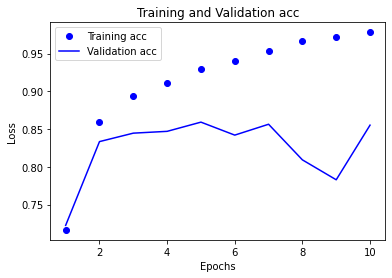

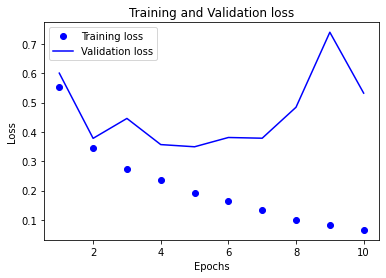

In [14]:
# Plotting results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()


plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 4.2 LSTM and GRU layers

In [17]:
# 1. Pesudo-code details of the LSTM architecture(1/2)

output_t = activation(dot(state_t, Uo) + dot(input_t, Wo) + dot(C_t, Vo) + bo)

i_t = activation(dot(state_t, Ui) + dot(input_t, Wi) + bi)
f_t = activation(dot(state_t, Uf) + dot(input_t, Ef) + bf)
k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)

In [18]:
# 2. Pesudo-code details of the LSTM architecture(2/2)
c_t + 1 = i_t * k_t + c_t * f_t

In [5]:
# 3. Using the LSTM layer in Keras
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

/home/sally/.local/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 142s 7ms/step - loss: 0.4943 - acc: 0.7714 - val_loss: 0.3311 - val_acc: 0.8652
Epoch 2/10
20000/20000 [==============================] - 122s 6ms/step - loss: 0.2904 - acc: 0.8881 - val_loss: 0.3088 - val_acc: 0.8784
Epoch 3/10
20000/20000 [==============================] - 123s 6ms/step - loss: 0.2306 - acc: 0.9141 - val_loss: 0.3561 - val_acc: 0.8500
Epoch 4/10
20000/20000 [==============================] - 115s 6ms/step - loss: 0.1963 - acc: 0.9277 - val_loss: 0.3410 - val_acc: 0.8470
Epoch 5/10
20000/20000 [==============================] - 115s 6ms/step - loss: 0.1744 - acc: 0.9366 - val_loss: 0.3312 - val_acc: 0.8804
Epoch 6/10
20000/20000 [==============================] - 115s 6ms/step - loss: 0.1546 - acc: 0.9442 - val_loss: 0.3505 - val_acc: 0.8512
Epoch 7/10
20000/20000 [==============================] - 115s 6ms/step - loss: 0.1367 - acc: 0.9518 - val_loss: 0.3289 - v

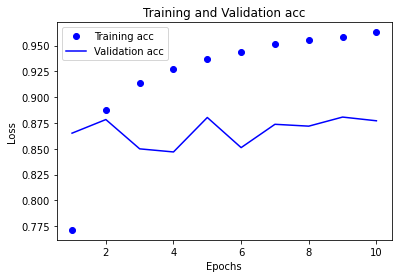

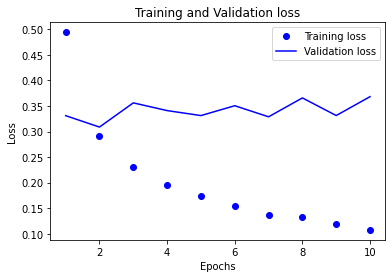

In [6]:
# Plotting results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()


plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()